In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.gradient_descent import SGD
from keras.layers.core import Dense
from keras.initializers import initializers_v1

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')




#загружаем данные


targets_data = np.load('/content/drive/My Drive/Experiments/Targets_data.npy')
targets_test = np.load('/content/drive/My Drive/Experiments/Targets_test.npy')
X_data =  np.load('/content/drive/My Drive/Experiments/X_data.npy')
X_test =  np.load('/content/drive/My Drive/Experiments/X_test.npy')

X_test_2 = np.load('/content/drive/My Drive/Glubins/X_test_1.npy')

if X_test.all() == X_test_2.all():
  print('True')
else:
  print('False')





#переходим к нейросети


model = Sequential()

inputs = len(X_data[0])

hidden_1 = 2*inputs  # число нейронов в первом скрытом слое

#hidden_1 = inputs
hidden_2 = 2*hidden_1 #число нейронов во втором скрытом слое
hidden_3 = 5*hidden_2 #число нейронов в третьем скрытом слое
#hidden_3 = hidden_2/2

outputs = 10000   #число пикселей

#hidden = 3

#l_rate = 0.0009#скорость обучения

l_rate = 0.00009#скорость обучения

num_of_epochs = 100 #количество эпох обучения

#1 - ый скрытый слой

model.add(Dense(hidden_1, input_shape = (inputs, ), activation = 'tanh'))

#2-й скрытый слой

model.add(Dense(hidden_2, activation = 'tanh'))

#3-й скрытый слой

model.add(Dense(hidden_3, activation = 'tanh'))

#выходной слой

model.add(Dense(outputs, activation = 'sigmoid'))


#компиляция модели

#model.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = l_rate, momentum = 0.5),
              #metrics = ['binary_accuracy'])

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = l_rate),
              metrics = ['binary_accuracy'])


print('X_data.shape', X_data.shape, targets_data.shape)

model.fit(X_data, targets_data, epochs = num_of_epochs, verbose = 2)

#начинается этап тестирования

print(X_data)
print('X_test =', X_test)


Mounted at /content/drive
True
X_data.shape (4704, 868) (4704, 10000)
Epoch 1/100
147/147 - 18s - loss: 0.1016 - binary_accuracy: 0.7308 - 18s/epoch - 121ms/step
Epoch 2/100
147/147 - 15s - loss: 0.0270 - binary_accuracy: 0.8515 - 15s/epoch - 103ms/step
Epoch 3/100
147/147 - 15s - loss: 0.0269 - binary_accuracy: 0.8515 - 15s/epoch - 102ms/step
Epoch 4/100
147/147 - 15s - loss: 0.0269 - binary_accuracy: 0.8514 - 15s/epoch - 102ms/step
Epoch 5/100
147/147 - 15s - loss: 0.0267 - binary_accuracy: 0.8516 - 15s/epoch - 103ms/step
Epoch 6/100
147/147 - 15s - loss: 0.0266 - binary_accuracy: 0.8517 - 15s/epoch - 103ms/step
Epoch 7/100
147/147 - 15s - loss: 0.0266 - binary_accuracy: 0.8514 - 15s/epoch - 103ms/step
Epoch 8/100
147/147 - 15s - loss: 0.0265 - binary_accuracy: 0.8513 - 15s/epoch - 104ms/step
Epoch 9/100
147/147 - 15s - loss: 0.0264 - binary_accuracy: 0.8514 - 15s/epoch - 104ms/step
Epoch 10/100
147/147 - 15s - loss: 0.0263 - binary_accuracy: 0.8512 - 15s/epoch - 104ms/step
Epoch 11/

In [ ]:
if X_test.all() == X_test_2.all():
  print('True')
else:
  print('False')



True


In [ ]:
Z_n = model.predict(X_test)

In [ ]:
if X_test

In [ ]:
np.save('/content/drive/My Drive/experiments/Results', Z_n)
print(X_test)

[[ 0.00494979  0.02121341  0.01612219 ...  0.00523264  0.02531467
   0.01810211]
 [-0.0111578  -0.02115635 -0.00782495 ...  0.00507173  0.02144617
   0.046515  ]
 [ 0.03542435  0.03232472  0.02863469 ... -0.00339483 -0.02051661
  -0.04398524]
 ...
 [-0.01567262 -0.00217675  0.01175446 ...  0.0190103   0.0172689
   0.01131911]
 [-0.01048901 -0.01587527 -0.04337349 ...  0.02097803  0.02466336
   0.01927711]
 [-0.00778098 -0.00072046  0.02089337 ...  0.00965418  0.03357349
   0.04481268]]


In [ ]:
X_test_2 =  np.load('/content/drive/My Drive/Glubins/X_test.npy')
Z_n1 = model.predict(X_test_2)
np.save('/content/drive/My Drive/Glubins/Results_3', Z_n1)

In [ ]:
#сохранить обученную модель
model_json = model.to_json()
with open("/content/drive/My Drive/Experiments/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Experiments/model.h5")
print("Saved model to disk")

Saved model to disk


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded model from disk
X_test.shape: (1947, 868)


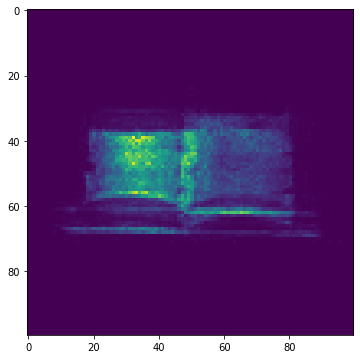

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.gradient_descent import SGD
from keras.layers.core import Dense
from keras.initializers import initializers_v1

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

from keras.models import model_from_json
X_test =  np.load('/content/drive/My Drive/Experiments/X_test.npy')

json_file = open('/content/drive/My Drive/Experiments/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Experiments/model.h5")
print("Loaded model from disk")


Results = loaded_model.predict(X_test)

print('X_test.shape:', X_test.shape)

np.save('/content/drive/My Drive/exper_1/Results_3', Results)

one_results = 255*Results[70]

#строим график
one_results = one_results.reshape((100, 100))

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#  Двумерный массив пикселей:

fig, ax = plt.subplots()

ax.imshow(one_results)

fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()